In [ ]:
## R diagrams in Python

# Introduction
This notebook discuses the way to generate all graphs in the class in python. There are few reasons driven us to do this implementation:
1.   Python is way more popluar than R in the real life situation and the working environment. It will be convinent if we know how to generate useful graphs in Python (potentially combining with other features in Python). 
2.   Some students only has Python experience before this class and the notebook can help them distinguish the difference between Python and R quickly.

In below, we will use Iris and Boston dataSet as an illustration for the basic useage of each plot.



boxplot
facet_wrap
relevel
hist
density
qqplot
ridge line
cleveland dotplot
heatmap
violin plot
alluvial plot
mosaic plot


We are going to import some python libraries for data visualization.
- matplotlib is a 2-D plotting library which can produce a variety of figures.
- seaborn is a data visualization library based on matplotlib. 
- numpy library supports mathematical operations on multi-dimensional arrays, and
- Pandas is a fast and strong data analysis tool. 



In [ ]:
## Environment SetUp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import statsmodels.api as sm
sns.set_style('darkgrid')

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Some general tips about matplotlib
### create figure:
fig = plt.figure()
### show figure:
fig.show()
### create subplots:
fig, ax = plt.subplots(nrows,ncolumns) \
### create the first subplot:
ax[0].boxplot(df.selected_column) 
### set x and y labels:
ax[0].set_xlabel("This is the x labbel")
ax[0].set_ylabel("This is the y label") 
### set subplot title:
ax[0].set_title("A good title")
### set the title for the entire plot:
fig.suptitle('Title for Entire Plot')

To demonstrate data visualization for continuous variables, we are going to use the iris dataset in the scikit library. The same dataset exists for R as well. 

In [ ]:
## Read in data
iris = datasets.load_iris()
boston = datasets.load_boston()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df2 = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
## Data Description
df.head(10)
df2.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


#Boxplot and Mutiple boxplots

The syntax for plotting a boxplot of selected column(s) from a data frame is as follows: \
DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)



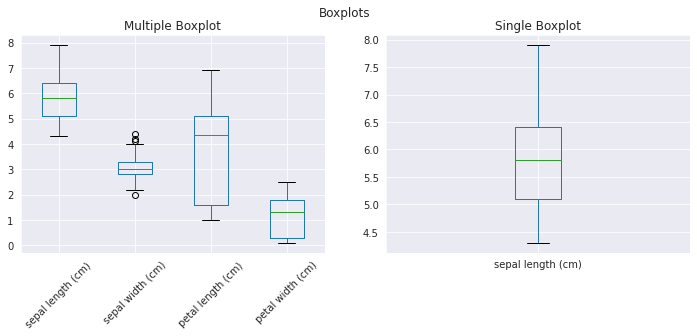

In [ ]:
##Multiple boxplots on one grid: 
fig,ax = plt.subplots(1,2,figsize=(12,4))
df.boxplot(column=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],ax=ax[0],rot=45)
df.boxplot(column=['sepal length (cm)'],ax=ax[1])
ax[0].set_title('Multiple Boxplot')
ax[1].set_title("Single Boxplot")
fig.suptitle('Boxplots');

# Histograms
The syntax for plotting histograms of selected column(s) from a data frame is as follows:

DataFrame.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, backend=None, legend=False, **kwargs)
- sharex and sharey allow us to plot multiple histograms with shared x or y axes. 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29c7c1dd10>,
      dtype=object)

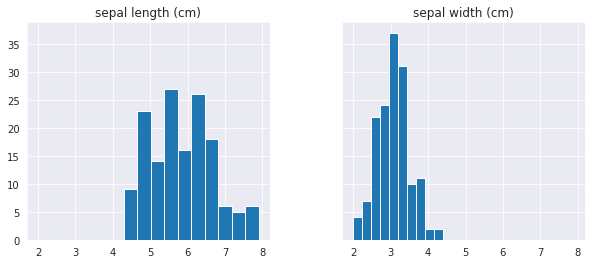

In [ ]:
## Histogram with shared axes: 
df.hist(column=['sepal length (cm)', 'sepal width (cm)'],figsize=(10,4),sharex=True,sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29c74a1090>]],
      dtype=object)

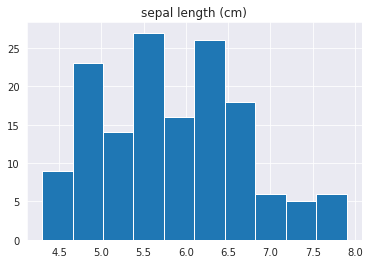

In [ ]:
## simple histogram:
df.hist('sepal length (cm)')

# Density Plot

The syntax for drawing a density plot is as follows:\
DataFrame.plot.density(bw_method=None, ind=None, **kwargs)
- bw_method are different methods to calculate bandwidth estimator. \

Below, we include the density plots for all four variables on the same pair of axes. 

Text(0.5, 1.0, 'Density Plot')

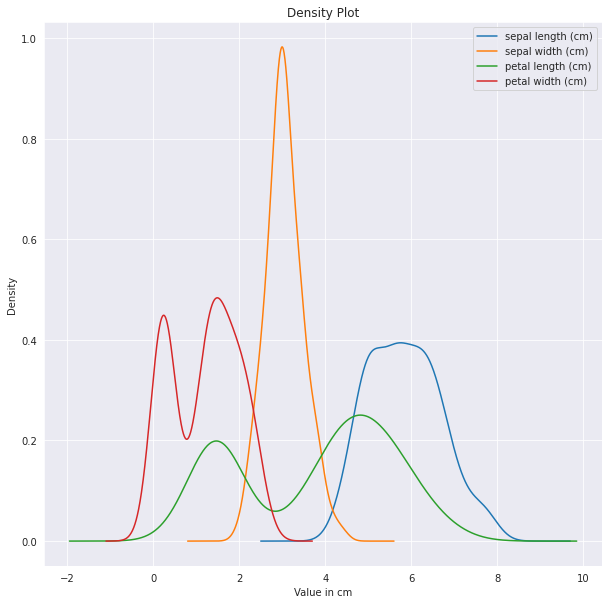

In [ ]:
## Density Plot
df.plot.density(figsize=(10,10))
plt.xlabel("Value in cm")
plt.title("Density Plot")

# Scatterplot

The syntax for scatterplot in matplotlib is as follows: \
matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)\
- x is the independent variable, and y is the dependent variable
- alpha allows us to change the alpha blending of the points. \

We can also make scatterplots with seaborn. The syntax is as follows:\

seaborn.lmplot(*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None, size=None)¶

- hue, col, row define the subsets of the data which allow us to distinguish different subgroups in the scatterplot





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


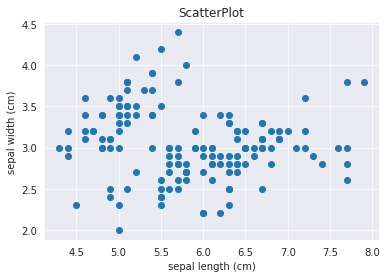

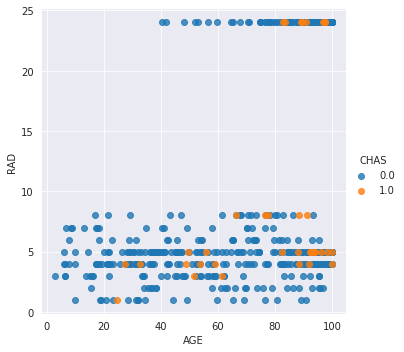

In [ ]:
#ScatterPlot
plt.scatter(x = df['sepal length (cm)'], y = df['sepal width (cm)'])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("ScatterPlot")

## color by categorical group
sns.lmplot('AGE', 'RAD', data = df2, hue = 'CHAS', fit_reg= False)

# QQ Plot
We need statsmodel.api to make qq plots in python. The syntax is as follows:\

statsmodels.graphics.gofplots.qqplot(data, dist=<scipy.stats._continuous_distns.norm_gen object>, distargs=(), a=0, loc=0, scale=1, fit=False, line=None, ax=None, **plotkwargs)

- line='45' shows the normal distribution



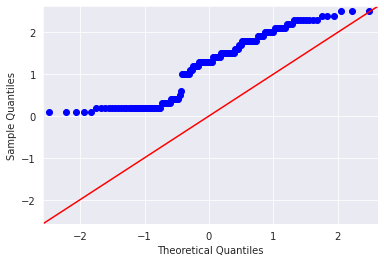

In [ ]:
##QQ plot
sm.qqplot(df['petal width (cm)'], line= '45')
plt.show()

# Ridgeplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


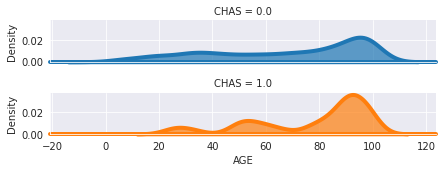

In [ ]:
## facetgrid acts like facet_wrap in the R
ridgeplot = sns.FacetGrid(df2, row="CHAS", hue="CHAS", aspect=5, height=1.25)

## create density graph using kde
ridgeplot.map(sns.kdeplot, 'AGE', clip_on=False,
       shade=True, alpha=0.7, lw=4, bw=.2)
  
ridgeplot.map(plt.axhline, y=0, lw=4, clip_on=False)